
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [2]:

import numpy as np
import matplotlib.pyplot as plt


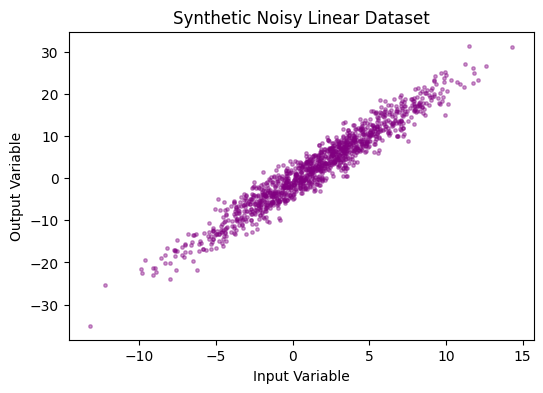

In [3]:
# We begin by creating artificial data to test and visualize our implementation.
# Instead of directly working with real-world data, we simulate a linear trend
# and then disturb it slightly using random variations to mimic realistic behavior.

num_points = 1200

# Generate input values centered around a chosen mean
X_vals = np.random.normal(loc=1.5, scale=4.0, size=num_points)

# Define the underlying linear relationship
slope = 2.3
intercept = -1.0

# Compute the target values using the linear equation
Y_vals = slope * X_vals + intercept

# Add random fluctuations so the points are not perfectly aligned
random_error = np.random.normal(0, 2.5, num_points)
Y_vals += random_error

# Plot the generated dataset
plt.figure(figsize=(6, 4))
plt.scatter(X_vals, Y_vals, c='purple', alpha=0.4, s=6)
plt.title("Synthetic Noisy Linear Dataset")
plt.xlabel("Input Variable")
plt.ylabel("Output Variable")
plt.show()


In [4]:
# Below is a from-scratch implementation of feature standardization.
# The goal is to rescale the data so that each feature has zero mean
# and unit variance, which helps many learning algorithms converge faster.
# This is done using the formula:
# x_scaled = (x - μ) / σ

class CustomStandardScaler:

    def fit(self, data):
        # Compute per-feature mean and standard deviation
        self.mu = np.mean(data, axis=0)
        self.sigma = np.std(data, axis=0)

        # Prevent division by zero in case a feature has no variation
        self.sigma = np.where(self.sigma == 0, 1.0, self.sigma)

    def transform(self, data):
        # Apply standardization using previously computed statistics
        return (data - self.mu) / self.sigma

    def fit_transform(self, data):
        # Convenience method: fit first, then transform
        self.fit(data)
        return self.transform(data)


In [7]:
# In this section, we implement Linear Regression without using any external ML library.
# The model is trained using gradient descent and also supports L2 regularization
# (commonly known as Ridge Regression). The regularization strength is controlled
# by the parameter `reg_strength`.

class CustomLinearRegressor:

    def __init__(self, learning_rate=0.005, iterations=1500, reg_strength=0.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.reg_strength = reg_strength
        self.theta = None          # weight vector
        self.intercept = 0.0       # bias term
        self.history = []          # to store loss values

    def fit(self, X, y):
        samples, features = X.shape

        # Initialize parameters
        self.theta = np.random.randn(features) * 0.01
        self.intercept = 0.0

        for _ in range(self.iterations):
            # Model prediction
            predictions = X @ self.theta + self.intercept

            # Mean squared error component
            mse = np.mean((predictions - y) ** 2) / 2

            # L2 regularization penalty
            ridge_penalty = (self.reg_strength / 2) * np.sum(self.theta ** 2)

            # Total loss
            total_loss = mse + ridge_penalty
            self.history.append(total_loss)

            # Gradient computation
            d_theta = (X.T @ (predictions - y)) / samples
            d_theta += self.reg_strength * self.theta
            d_intercept = np.sum(predictions - y) / samples

            # Parameter update step
            self.theta -= self.learning_rate * d_theta
            self.intercept -= self.learning_rate * d_intercept

    def predict(self, X):
        return X @ self.theta + self.intercept


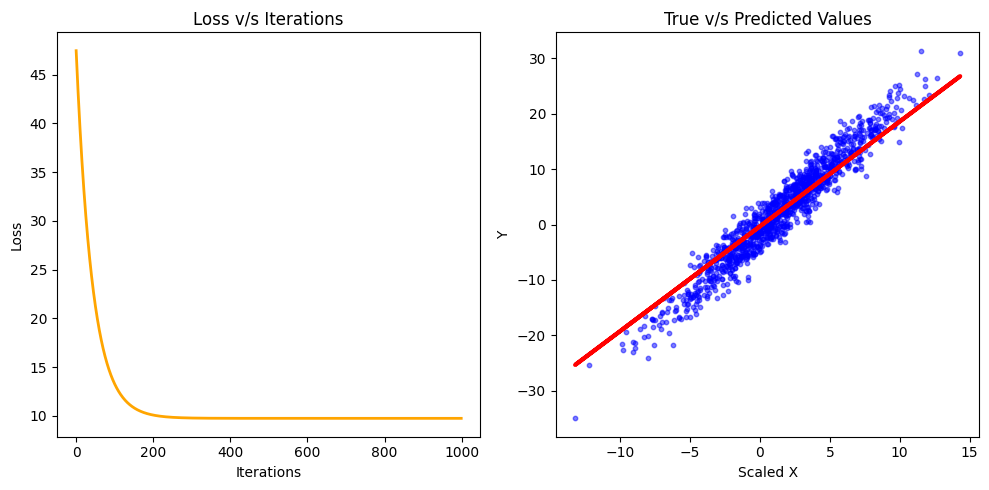

In [16]:
# Plotting training loss and regression fit using the generated dataset

# Reshape input feature for scaling
X_input = X_vals.reshape(-1, 1)

# Apply manual standard scaling
scaler_obj = CustomStandardScaler()
X_scaled = scaler_obj.fit_transform(X_input)

# Initialize and train linear regression with L2 regularization
model = CustomLinearRegressor(
    learning_rate=0.01,
    iterations=1000,
    reg_strength=0.2
)
model.fit(X_scaled, Y_vals)

# Predict outputs using the trained model
Y_predicted = model.predict(X_scaled)

# Create visualization
plt.figure(figsize=(10, 5))

# Loss vs iterations
plt.subplot(1, 2, 1)
plt.plot(model.history, color='orange', linewidth=2)
plt.title("Loss v/s Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# True vs predicted values
plt.subplot(1, 2, 2)
plt.scatter(X_vals, Y_vals, color='blue', alpha=0.5, s=10)
plt.plot(X_vals, Y_predicted, color='red', linewidth=3)
plt.title("True v/s Predicted Values")
plt.xlabel("Scaled X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


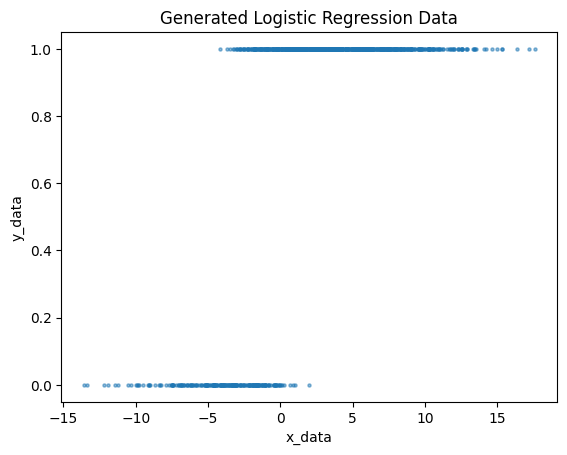

In [17]:
# Generating sample data to test logistic regression
# We create a linear pattern first and then convert it into
# binary labels using the sigmoid function.

# Input feature values
x_data = np.random.normal(2.0, 5.0, 1000)

# Line parameters
w = 1.75
b = 3.0

# Linear combination
z = w * x_data + b

# Adding noise so data is not perfectly separable
noise = np.random.normal(0, 3.0, 1000)
z = z + noise

# Sigmoid to get probabilities
y_prob = 1 / (1 + np.exp(-z))

# Converting probabilities to class labels
y_data = np.where(y_prob >= 0.5, 1, 0)

# Plotting the generated points
plt.scatter(x_data, y_data, alpha=0.5, s=5)
plt.title("Generated Logistic Regression Data")
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.show()


In [18]:
# Implementing the sigmoid activation function
# This function maps any real value into the range (0, 1)

def sigmoid(z):
    # Clip values to avoid overflow issues with exp
    z = np.clip(z, -200, 200)

    sig = 1 / (1 + np.exp(-z))
    return sig


In [19]:
# Implementing Logistic Regression from scratch with L2 regularization
# The model uses gradient descent to minimize binary cross-entropy loss

class LogisticRegressionScratch:

    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape

        # Initialize parameters
        self.w = np.zeros(n)
        self.b = 0.0

        for _ in range(self.epochs):
            # Linear part
            z = np.dot(X, self.w) + self.b

            # Apply sigmoid
            y_hat = sigmoid(z)

            # Clipping to avoid log(0)
            y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

            # Binary cross-entropy loss with L2 penalty
            loss = -np.mean(
                y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
            )
            loss += (self.l2_lambda / 2) * np.sum(self.w ** 2)

            # Gradients
            dw = (1 / m) * np.dot(X.T, (y_hat - y))
            dw += self.l2_lambda * self.w
            db = (1 / m) * np.sum(y_hat - y)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Store loss for analysis
            self.losses.append(loss)

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


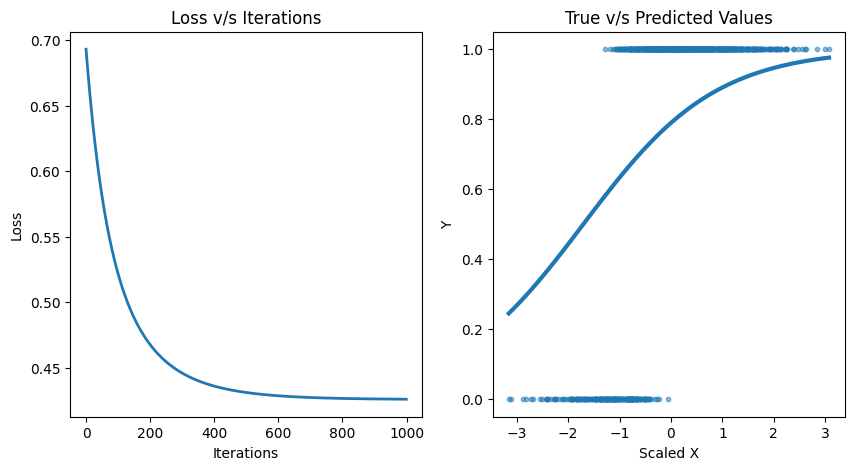

In [20]:
# Testing the logistic regression model
# Plotting loss over iterations and visualizing predictions

# Reshape feature for scaling
x_test = x_data.reshape(-1, 1)

# Scale the input feature
scaler_test = CustomStandardScaler()
x_test_scaled = scaler_test.fit_transform(x_test)

# Initialize and train logistic regression model
log_model = LogisticRegressionScratch(
    lr=0.02,
    epochs=1000,
    l2_lambda=0.2
)
log_model.fit(x_test_scaled, y_data)

# Get predictions
y_pred = log_model.predict(x_test_scaled)

# Create plots
plt.figure(figsize=(10, 5))

# Plot 1: Loss vs Iterations
plt.subplot(1, 2, 1)
plt.plot(log_model.losses, linewidth=2)
plt.title("Loss v/s Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Plot 2: True vs Predicted values
plt.subplot(1, 2, 2)
plt.scatter(x_test_scaled, y_data, alpha=0.5, s=10)

# Plot probability curve
x_range = np.linspace(
    x_test_scaled.min(), x_test_scaled.max(), 100
).reshape(-1, 1)
plt.plot(x_range, log_model.predict_proba(x_range), linewidth=3)

plt.title("True v/s Predicted Values")
plt.xlabel("Scaled X")
plt.ylabel("Y")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [21]:
# Implementing K-Means clustering for matrix data
# The matrix is flattened first, clustering is applied,
# and then results are mapped back to original indices.

def kmeans_matrix_section3(mat3, k3, max_steps=100):

    rows3, cols3 = mat3.shape
    flat_data3 = mat3.flatten()

    # Randomly initialize centroids from matrix values
    centers3 = np.random.choice(flat_data3, k3, replace=False).astype(float)

    for step in range(max_steps):
        # Compute distance of each point from centroids
        dist3 = np.abs(flat_data3[:, None] - centers3)
        cluster_id3 = np.argmin(dist3, axis=1)

        # Update centroids
        new_centers3 = np.zeros(k3)
        for idx in range(k3):
            new_centers3[idx] = np.mean(flat_data3[cluster_id3 == idx])

        # Stop if centroids do not change
        if np.all(new_centers3 == centers3):
            break

        centers3 = new_centers3

    # Reshape cluster labels back to matrix form
    cluster_map3 = cluster_id3.reshape(rows3, cols3)

    # Store indices of each cluster
    index_map3 = {}
    for i in range(rows3):
        for j in range(cols3):
            cid = cluster_map3[i, j]
            if cid not in index_map3:
                index_map3[cid] = [(i, j)]
            else:
                index_map3[cid].append((i, j))

    return cluster_map3, index_map3, centers3


Cluster Map:
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]

Cluster Index Mapping:
{np.int64(0): [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1

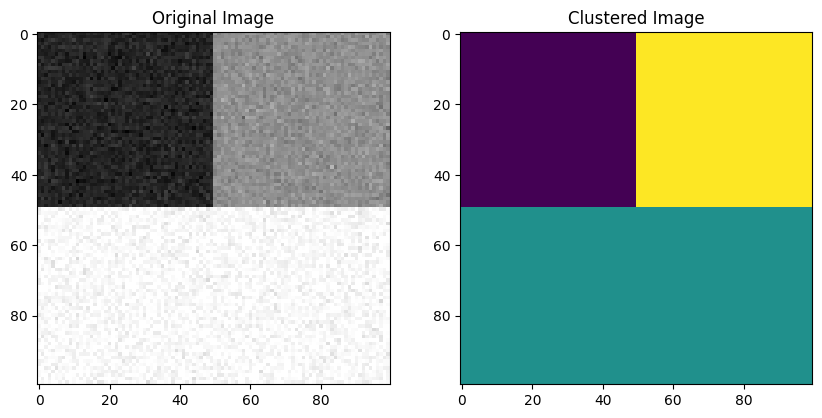

In [22]:
# Testing K-Means clustering on synthetic matrix data
# The matrix is created with different intensity regions
# to clearly observe clustering behavior.

# Create a blank matrix
mat3 = np.zeros((100, 100))

# Fill different regions with different distributions
mat3[0:50, 0:50] = np.random.normal(50, 10, (50, 50))
mat3[0:50, 50:100] = np.random.normal(150, 10, (50, 50))
mat3[50:100, :] = np.random.normal(250, 10, (50, 100))

# Limit values to valid range
mat3 = np.clip(mat3, 0, 255)

# Number of clusters
k3 = 3

# Apply K-Means clustering
cluster_map3, index_map3, centers3 = kmeans_matrix_section3(mat3, k3)

# Display results
print("Cluster Map:")
print(cluster_map3)

print("\nCluster Index Mapping:")
print(index_map3)

print("\nCluster Centers:")
print(centers3)

# Visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mat3, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cluster_map3, cmap='viridis')
plt.title("Clustered Image")

plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.


In [23]:
# Reshaping the feature for model input
x_raw = x_data.reshape(-1, 1)
y_raw = y_data


In [24]:
# Training logistic regression without standardization

model_no_scale = LogisticRegressionScratch(
    lr=0.02,
    epochs=1000,
    l2_lambda=0.1
)

model_no_scale.fit(x_raw, y_raw)


In [25]:
# Applying standardization
scaler_bonus = CustomStandardScaler()
x_scaled = scaler_bonus.fit_transform(x_raw)

# Training logistic regression with standardization
model_scaled = LogisticRegressionScratch(
    lr=0.02,
    epochs=1000,
    l2_lambda=0.1
)

model_scaled.fit(x_scaled, y_raw)


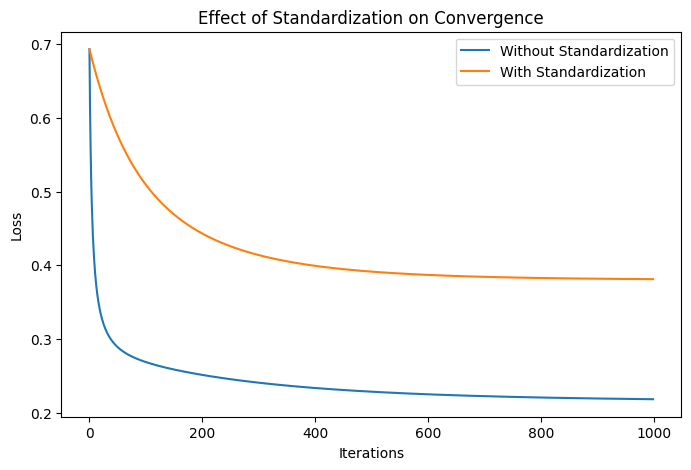

In [26]:
# Comparing convergence behavior

plt.figure(figsize=(8, 5))

plt.plot(model_no_scale.losses, label="Without Standardization")
plt.plot(model_scaled.losses, label="With Standardization")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of Standardization on Convergence")
plt.legend()
plt.show()


In [27]:
# Testing different regularization values
lambda_values = [0.0, 0.1, 1.0]
loss_histories = []

for lam in lambda_values:
    model_temp = LogisticRegressionScratch(
        lr=0.02,
        epochs=1000,
        l2_lambda=lam
    )
    model_temp.fit(x_scaled, y_raw)
    loss_histories.append(model_temp.losses)


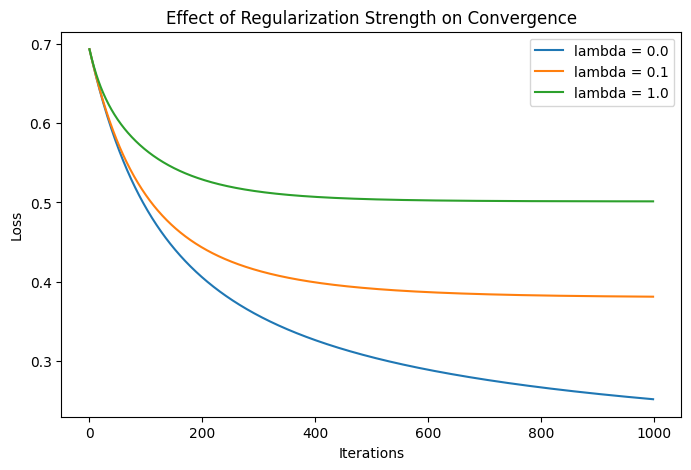

In [28]:
# Plotting loss curves for different regularization strengths

plt.figure(figsize=(8, 5))

for i, lam in enumerate(lambda_values):
    plt.plot(loss_histories[i], label=f"lambda = {lam}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of Regularization Strength on Convergence")
plt.legend()
plt.show()
